In [1]:
!pip install numpy 



[notice] A new release of pip is available: 23.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install pandas 



[notice] A new release of pip is available: 23.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib



[notice] A new release of pip is available: 23.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install scikit-learn 



[notice] A new release of pip is available: 23.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install seaborn



[notice] A new release of pip is available: 23.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install tensorflow



[notice] A new release of pip is available: 23.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
# Set up GPU (if available)
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [6]:
# Load 
data = pd.read_csv('diabetes.csv')


In [7]:
# Prepare the data
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [8]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Create the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [38]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8279 - loss: 0.3522 - val_accuracy: 0.7317 - val_loss: 0.5429
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8374 - loss: 0.3456 - val_accuracy: 0.7236 - val_loss: 0.5459
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8235 - loss: 0.3507 - val_accuracy: 0.7154 - val_loss: 0.5399
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8370 - loss: 0.3206 - val_accuracy: 0.7236 - val_loss: 0.5373
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8363 - loss: 0.3475 - val_accuracy: 0.7154 - val_loss: 0.5420
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8475 - loss: 0.3125 - val_accuracy: 0.7154 - val_loss: 0.5428
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8492 - loss: 0.3202 - val_accuracy: 0.7236 - val_loss: 0.5414
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8493 - loss: 0.3289 - val_accuracy: 0.7154 - 

In [16]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7372 - loss: 0.6336
Test accuracy: 0.7338


In [17]:
# Get predictions
predictions = model.predict(X_test_scaled)
predicted_classes = (predictions > 0.5).astype(int).flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [18]:
# Generate classification report
report = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        99
           1       0.63      0.60      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154



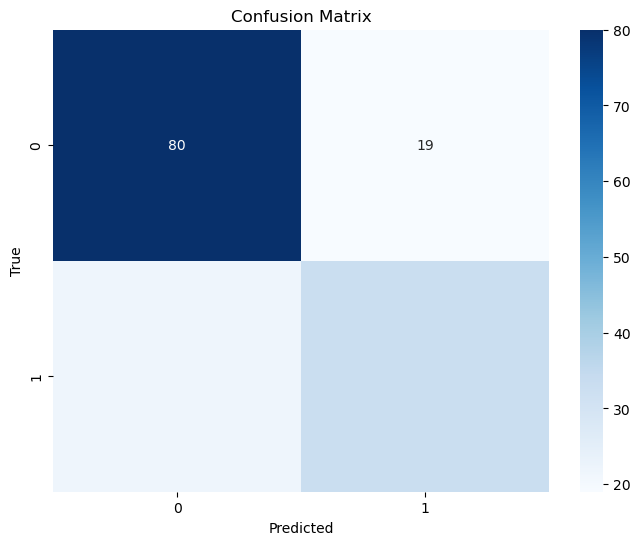

In [19]:
# Plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

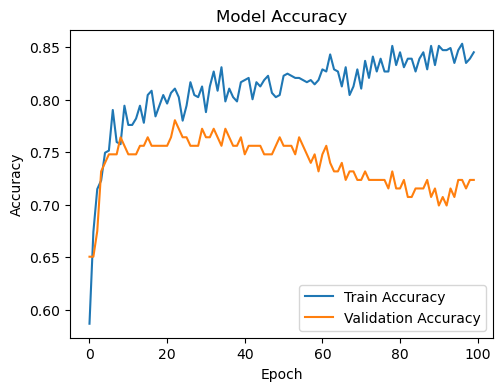

In [20]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

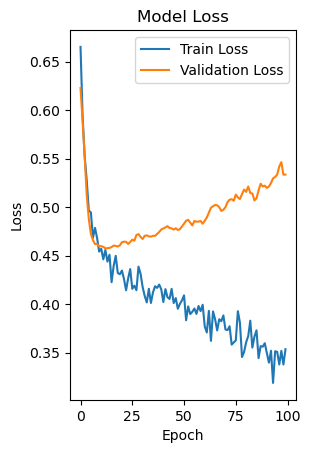

In [21]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [22]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [23]:
# Feature importance analysis
feature_importance = model.layers[0].get_weights()[0]
feature_importance = np.abs(feature_importance).mean(axis=1)
feature_importance = pd.Series(feature_importance, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

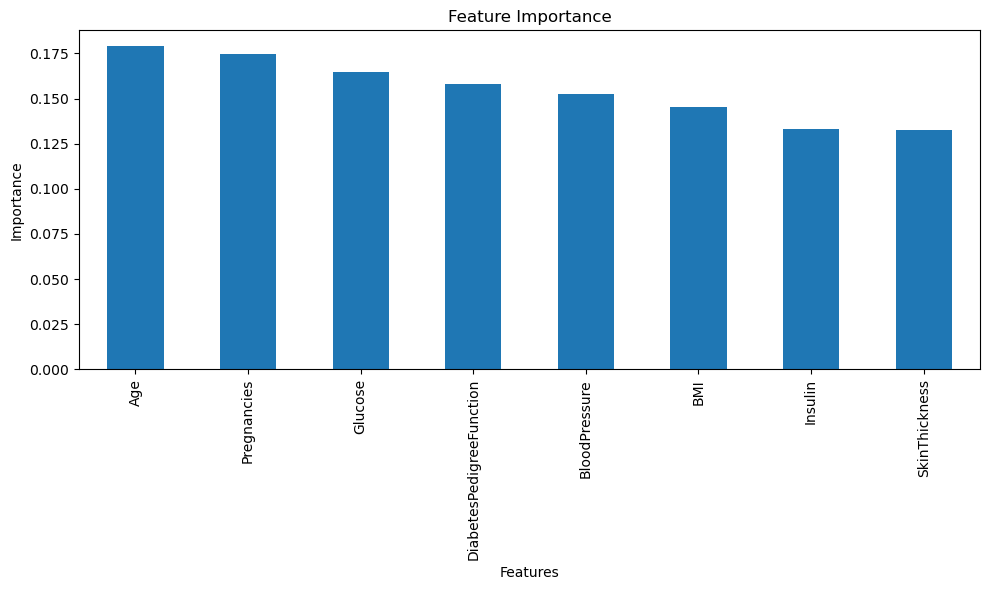

In [24]:
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [33]:
# Modify the predict_diabetes function
def predict_diabetes(data):
    # Ensure data is a DataFrame with correct column names
    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                                           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
    
    # Scale the data
    scaled_data = scaler.transform(data)
    
    # Make prediction
    prediction = model.predict(scaled_data)
    return prediction[0][0]

In [34]:
sample_data = {
    "Pregnancies": 6,
    "Glucose": 148,
    "BloodPressure": 72,
    "SkinThickness": 35,
    "Insulin": 0,
    "BMI": 33.6,
    "DiabetesPedigreeFunction": 0.627,
    "Age": 50
}

In [35]:
# Convert the dictionary to a pandas DataFrame
new_data = pd.DataFrame([sample_data])

In [37]:
# Make prediction
risk = predict_diabetes(new_data)
print(f"Diabetes risk: {risk:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Diabetes risk: 0.82
